<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Description-of-data-at-a-glance" data-toc-modified-id="Description-of-data-at-a-glance-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Description of data at a glance</a></span></li><li><span><a href="#Analysisng-the-Classes" data-toc-modified-id="Analysisng-the-Classes-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Analysisng the Classes</a></span></li><li><span><a href="#Analysing-the-features" data-toc-modified-id="Analysing-the-features-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Analysing the features</a></span><ul class="toc-item"><li><span><a href="#Univariate-Analysis" data-toc-modified-id="Univariate-Analysis-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Univariate Analysis</a></span><ul class="toc-item"><li><span><a href="#Skewness-and-Kurtosis" data-toc-modified-id="Skewness-and-Kurtosis-1.3.1.1"><span class="toc-item-num">1.3.1.1&nbsp;&nbsp;</span>Skewness and Kurtosis</a></span></li></ul></li><li><span><a href="#Bivariate-Analysis" data-toc-modified-id="Bivariate-Analysis-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Bivariate Analysis</a></span></li></ul></li><li><span><a href="#Correlation-Analysis" data-toc-modified-id="Correlation-Analysis-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Correlation Analysis</a></span></li><li><span><a href="#Feature-importances" data-toc-modified-id="Feature-importances-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Feature importances</a></span></li><li><span><a href="#Cleaning-the-data" data-toc-modified-id="Cleaning-the-data-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Cleaning the data</a></span><ul class="toc-item"><li><span><a href="#Dealing-with-missing-values" data-toc-modified-id="Dealing-with-missing-values-1.6.1"><span class="toc-item-num">1.6.1&nbsp;&nbsp;</span>Dealing with missing values</a></span></li><li><span><a href="#Checking-for-negative-values" data-toc-modified-id="Checking-for-negative-values-1.6.2"><span class="toc-item-num">1.6.2&nbsp;&nbsp;</span>Checking for negative values</a></span></li><li><span><a href="#Outlier-Removal" data-toc-modified-id="Outlier-Removal-1.6.3"><span class="toc-item-num">1.6.3&nbsp;&nbsp;</span>Outlier Removal</a></span></li></ul></li></ul></li></ul></div>

<center><h1>Exploratory Data Analysis</h1></center>

> Use the book [Feature Engineering and Selection: A Practical Approach for Predictive Models](http://www.feat.engineering/) to perform complete EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PowerTransformer

from pathlib import Path
from scipy.stats import iqr, zscore, skew
from prettytable import PrettyTable, MSWORD_FRIENDLY, DEFAULT, PLAIN_COLUMNS

from collections import Counter
from tqdm import tqdm

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

from IPython.display import Image, display

sns.set(rc={"figure.figsize": (10, 8)}, font_scale=1.25)

In [2]:
data_folder = Path("../DryBeanDataset/")

In [3]:
data_path = data_folder.joinpath("Dry_Bean_Dataset.csv")

In [4]:
df = pd.read_csv(data_path)

In [9]:
df.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272751  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332      0.003147      0.834222      0.998724  SEKER  
1     0.953861      0.006979      0.003564      0.909851      0.998430  SEKER  
2     0.908774      0.007244      0.003048      0.825871      0.999066  SEKER  
3     0.928329      0.007017      0.003215      0.861794      0.994199  SEKER  
4     0.970516      0.006697      0.003665      0.941900      0.999166  SEKER

We won't be making aby changes on the original dataframe. So, let's make a deepcopy of the original

In [8]:
df_copy = df.copy()

## Description of data at a glance

We will use this dataframe for further analysis

In [9]:
desc = df_copy.describe()
desc

Area     Perimeter  MajorAxisLength  MinorAxisLength  \
count   13611.000000  13611.000000     13611.000000     13611.000000   
mean    53048.284549    855.283459       320.141867       202.270714   
std     29324.095717    214.289696        85.694186        44.970091   
min     20420.000000    524.736000       183.601165       122.512653   
25%     36328.000000    703.523500       253.303633       175.848170   
50%     44652.000000    794.941000       296.883367       192.431733   
75%     61332.000000    977.213000       376.495012       217.031741   
max    254616.000000   1985.370000       738.860154       460.198497   

       AspectRation  Eccentricity     ConvexArea  EquivDiameter        Extent  \
count  13611.000000  13611.000000   13611.000000   13611.000000  13611.000000   
mean       1.583242      0.750895   53768.200206     253.064220      0.749733   
std        0.246678      0.092002   29774.915817      59.177120      0.049086   
min        1.024868      0.218951   20684.000000     161.243764      0.555315   
25%        1.432307      0.715928   36714.500000     215.068003      0.718634   
50%        1.551124      0.764441   45178.000000     238.438026      0.759859   
75%        1.707109      0.810466   62294.000000     279.446467      0.786851   
max        2.430306      0.911423  263261.000000     569.374358      0.866195   

           Solidity     roundness   Compactness  ShapeFactor1  ShapeFactor2  \
count  13611.000000  13611.000000  13611.000000  13611.000000  13611.000000   
mean       0.987143      0.873282      0.799864      0.006564      0.001716   
std        0.004660      0.059520      0.061713      0.001128      0.000596   
min        0.919246      0.489618      0.640577      0.002778      0.000564   
25%        0.985670      0.832096      0.762469      0.005900      0.001154   
50%        0.988283      0.883157      0.801277      0.006645      0.001694   
75%        0.990013      0.916869      0.834270      0.007271      0.002170   
max        0.994677      0.990685      0.987303      0.010451      0.003665   

       ShapeFactor3  ShapeFactor4  
count  13611.000000  13611.000000  
mean       0.643590      0.995063  
std        0.098996      0.004366  
min        0.410339      0.947687  
25%        0.581359      0.993703  
50%        0.642044      0.996386  
75%        0.696006      0.997883  
max        0.974767      0.999733

A brief overview of the dataframe 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [11]:
len(df_copy)

13611

In [12]:
CLASSES = df_copy.Class.unique()
CLASSES

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

- We have 16 features, 12 dimensional and 4 shape features
- The `Class` column contains the Classes
- We have 13,611 rows each corresponding to 16 features per bean
- We have got 5 different classes: 'SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'

In [13]:
FEATURE_COLUMNS = df.columns.to_list()[:-1]

## Analysisng the Classes

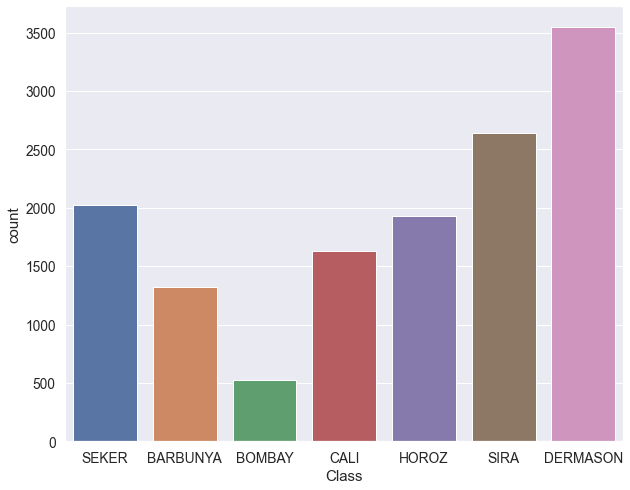

In [14]:
_ = sns.countplot(data=df, x="Class")

*Obvservation*

- We have got 5 classes and above are the counts of the classes. As, we can see that the majority class is `DERMASON` and minority one is `BOMBAY`. The data is imbalanced as `BOMBAY` has only 500 examples where as `DERMASON` has 3500 examples. 

## Analysing the features

### Univariate Analysis

In [15]:
def plot_all_feats(df=None, typ="hist", title="Features and their distributions"):
    types = {
        "hist": sns.histplot,
        "bar": sns.barplot,
        "kde": sns.kdeplot,
        "box": sns.boxplot,
    }

    if typ not in types:
        print(f"[Error] Plot is not defined, choose from {list(types.keys())}")
    else:

        fig, axes = plt.subplots(4, 4)
        fig.suptitle(title)
        fig.set_size_inches(20, 20, forward=True)

        k = 0
        for i in range(4):
            for j in range(4):
                types[typ](ax=axes[i, j], data=df, x=FEATURE_COLUMNS[k])
                k += 1

In [16]:
def show_transforms(df, column, method="yeo-johnson"):
    fig, axes = plt.subplots(1, 2)
    fig.suptitle(f"Before v/s After Transformation for {column}")
    fig.set_size_inches(20, 10, forward=True)

    pt = PowerTransformer()
    feat = pt.fit_transform(df[column].values.reshape(-1, 1))

    plt1 = sns.kdeplot(ax=axes[0], data=df, x=column)
    plt1.set_xlabel(f"Skewness = {skew(df[column].values)}")

    plt2 = sns.kdeplot(ax=axes[1], x=feat.flatten())
    plt2.set_xlabel(f"Skewness = {skew(feat)[0]}")

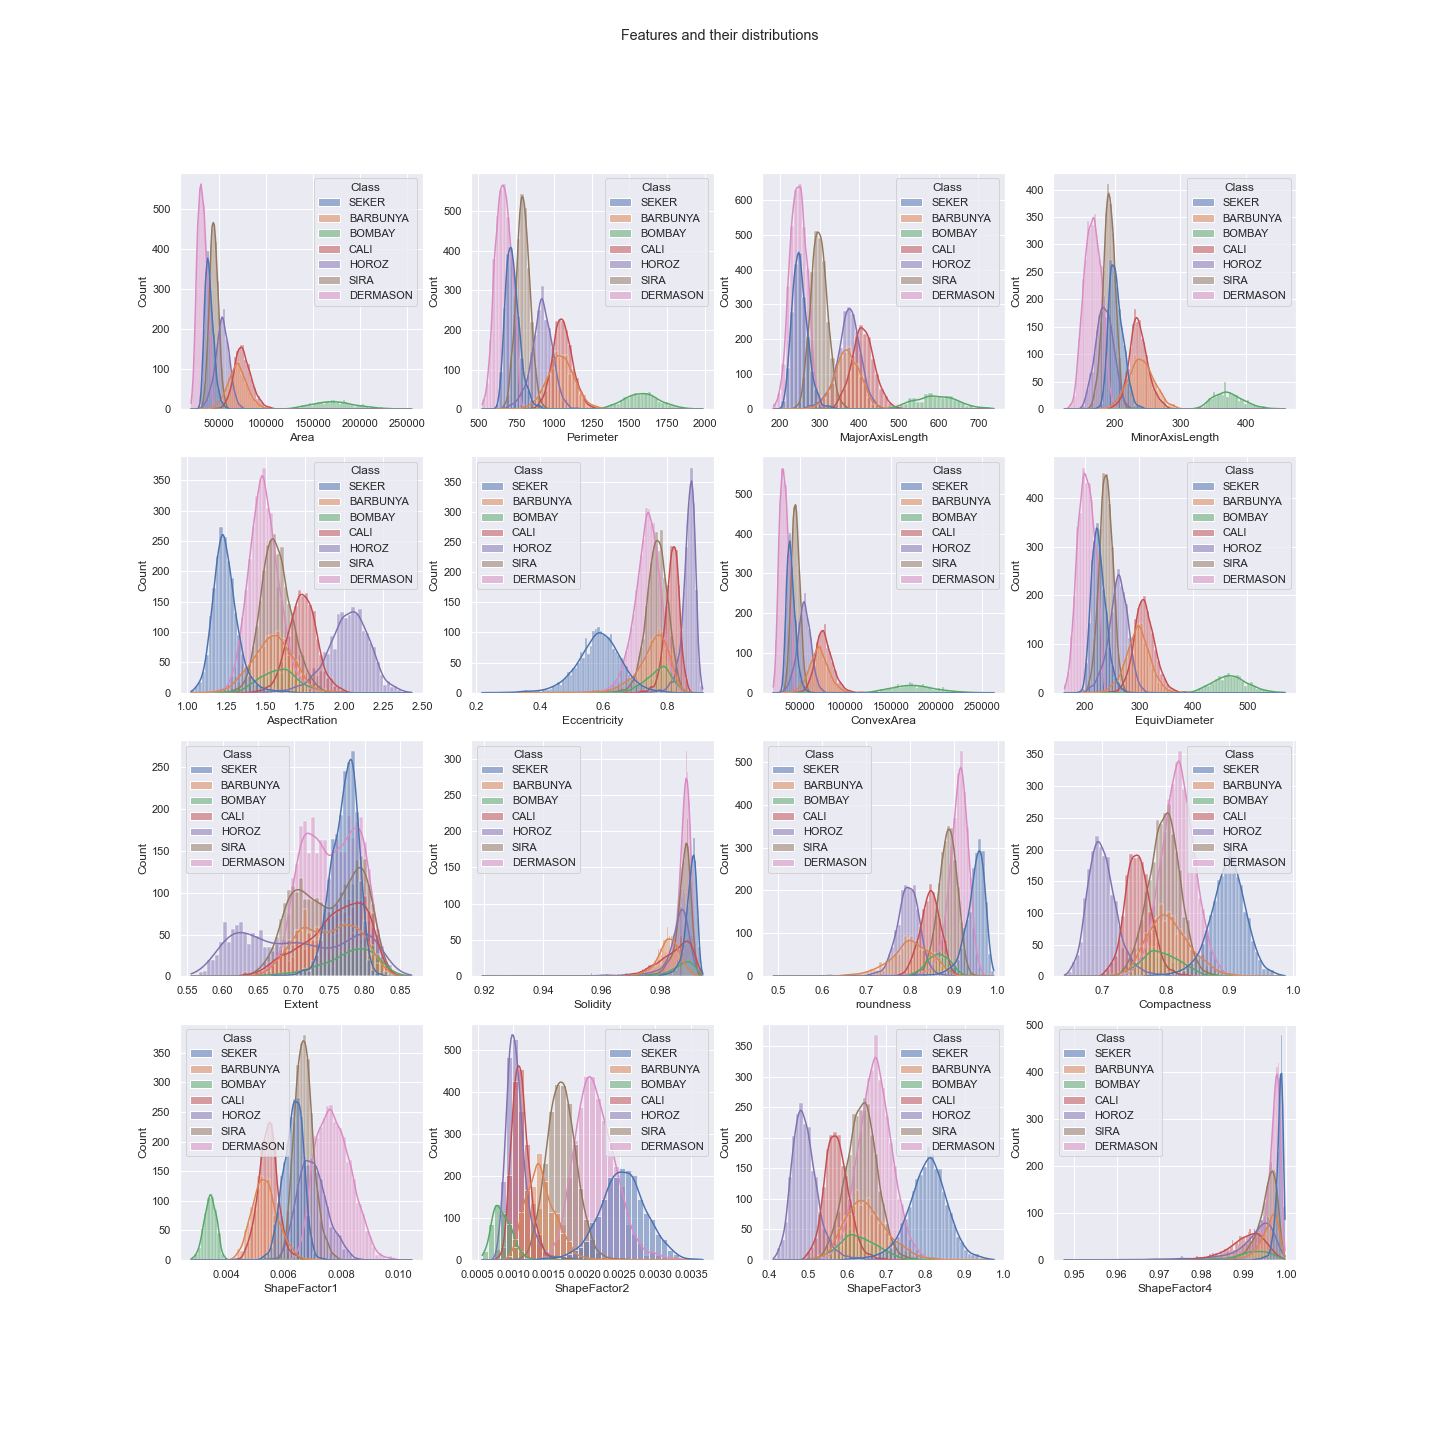

In [15]:
if Path("Features_and_histplot.png").exists():
    display(Image("Features_and_histplot.png"))
else:
    plot_all_feats(df=df_copy, typ="hist")

*Obvservation*

- `BOMBAY` class can be differentiated easily using any feature
- The other classes have a lot of overlap and are not easy to distinguish

#### Skewness and Kurtosis

Skewnewss and Kurtosis is a measure of the tailedness of the distribution. We need to transform the data so that it is normally distirbuted. 

In [16]:
Table_sk = PrettyTable(["Column", "Skewness"])
for col in FEATURE_COLUMNS:
    Table_sk.add_row([col, df_copy[col].skew()])
print(Table_sk.get_string(sortby="Skewness", reversesort=True))

+-----------------+---------------------+
|      Column     |       Skewness      |
+-----------------+---------------------+
|       Area      |  2.9529309714284606 |
|    ConvexArea   |  2.9418211110165506 |
| MinorAxisLength |  2.2382105395651473 |
|  EquivDiameter  |  1.9489576094878978 |
|    Perimeter    |  1.6261235244866201 |
| MajorAxisLength |  1.3578152835457427 |
|   AspectRation  |  0.582573399255909  |
|   ShapeFactor2  | 0.30122591882133765 |
|   ShapeFactor3  | 0.24248092661997728 |
|   Compactness   | 0.03711545808296861 |
|   ShapeFactor1  | -0.5341405486852819 |
|    roundness    | -0.6357489503361226 |
|      Extent     | -0.8953484276830443 |
|   Eccentricity  | -1.0628239308671301 |
|     Solidity    | -2.5500931058430196 |
|   ShapeFactor4  |  -2.759482909435988 |
+-----------------+---------------------+


*Obvservation*

- All of the features excepting `AspectRation`, `ShapeFactor3`, `ShapeFactor2` and `Compactness` are highly skewed.

##### Removing the skewness

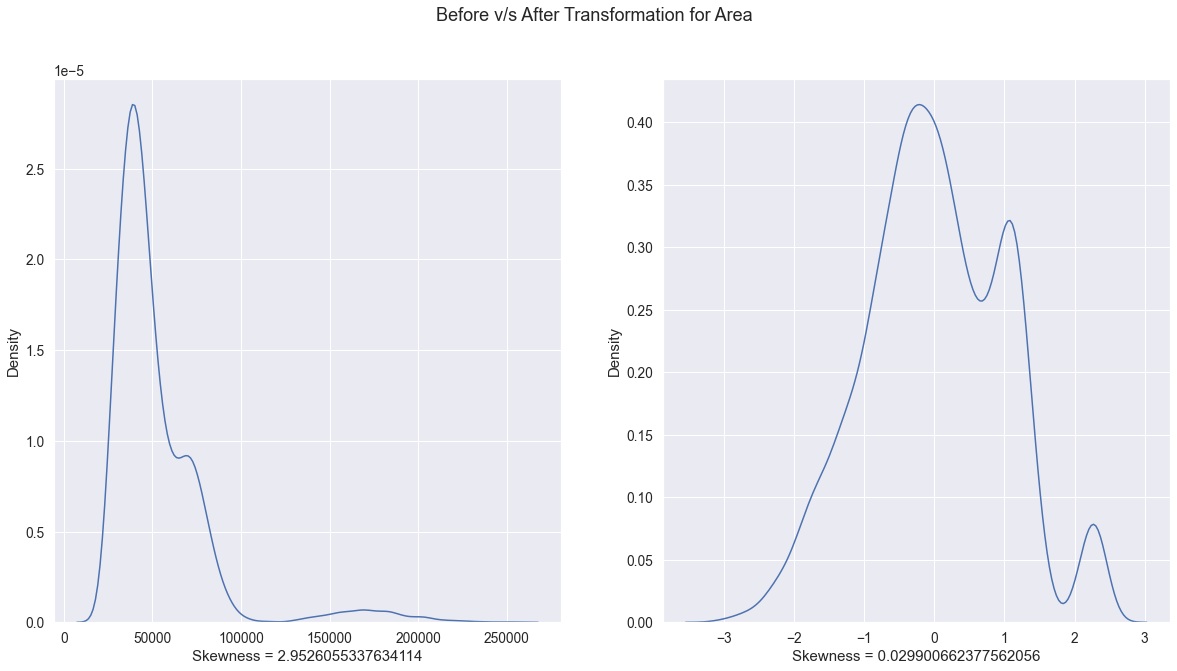

In [17]:
show_transforms(df=df_copy, column="Area")

C:\Users\abhi0\anaconda3\envs\tensorflow\lib\site-packages\numpy\core\_methods.py:235: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


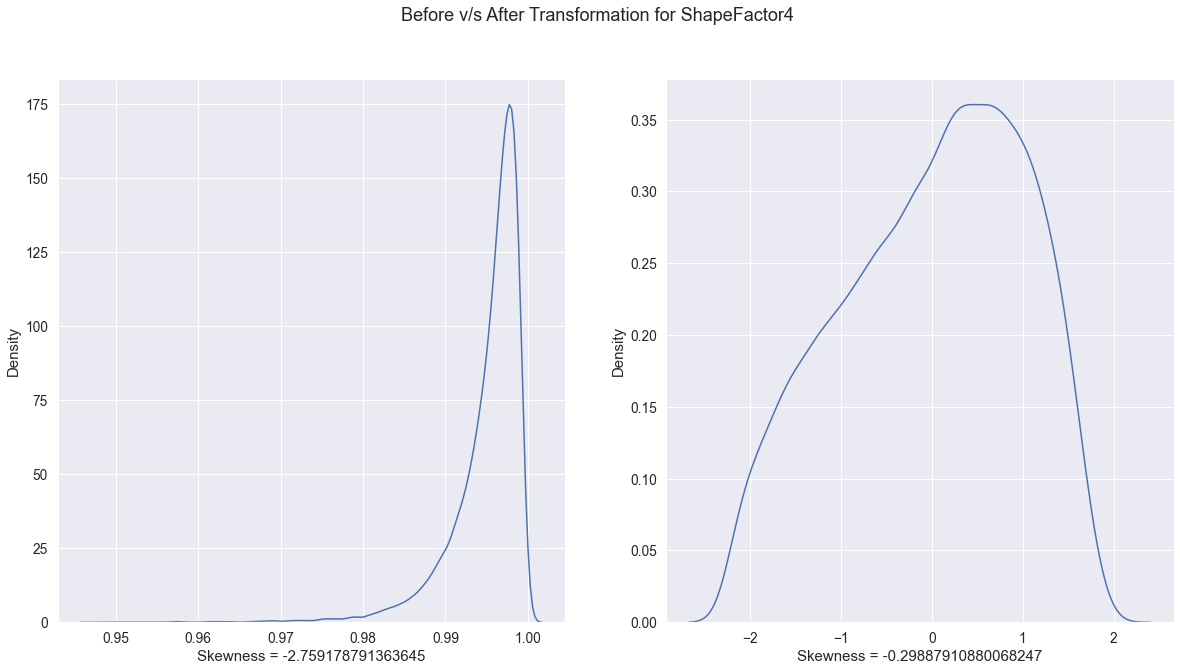

In [18]:
show_transforms(df=df_copy, column="ShapeFactor4")

In [19]:
Table_k = PrettyTable(["Column", "Skewness"])
for col in FEATURE_COLUMNS:
    Table_k.add_row([col, df_copy[col].kurtosis()])
print(Table_k.get_string(sortby="Skewness", reversesort=True))

+-----------------+----------------------+
|      Column     |       Skewness       |
+-----------------+----------------------+
|   ShapeFactor4  |  13.038067097671407  |
|     Solidity    |  12.799620936323317  |
|       Area      |  10.800813973816409  |
|    ConvexArea   |  10.743640152020804  |
| MinorAxisLength |  6.651066803328705   |
|  EquivDiameter  |   5.19205725598947   |
|    Perimeter    |  3.5881233266325765  |
| MajorAxisLength |   2.53190206240226   |
|   Eccentricity  |  1.3874555963770936  |
|   ShapeFactor1  |  0.7143548302375566  |
|      Extent     |  0.6433188425572376  |
|    roundness    | 0.37430633433357974  |
|   AspectRation  | 0.11381444065836366  |
|   ShapeFactor3  | -0.14447503629773628 |
|   Compactness   | -0.22345946825861462 |
|   ShapeFactor2  | -0.8592542004098931  |
+-----------------+----------------------+


### Bivariate Analysis

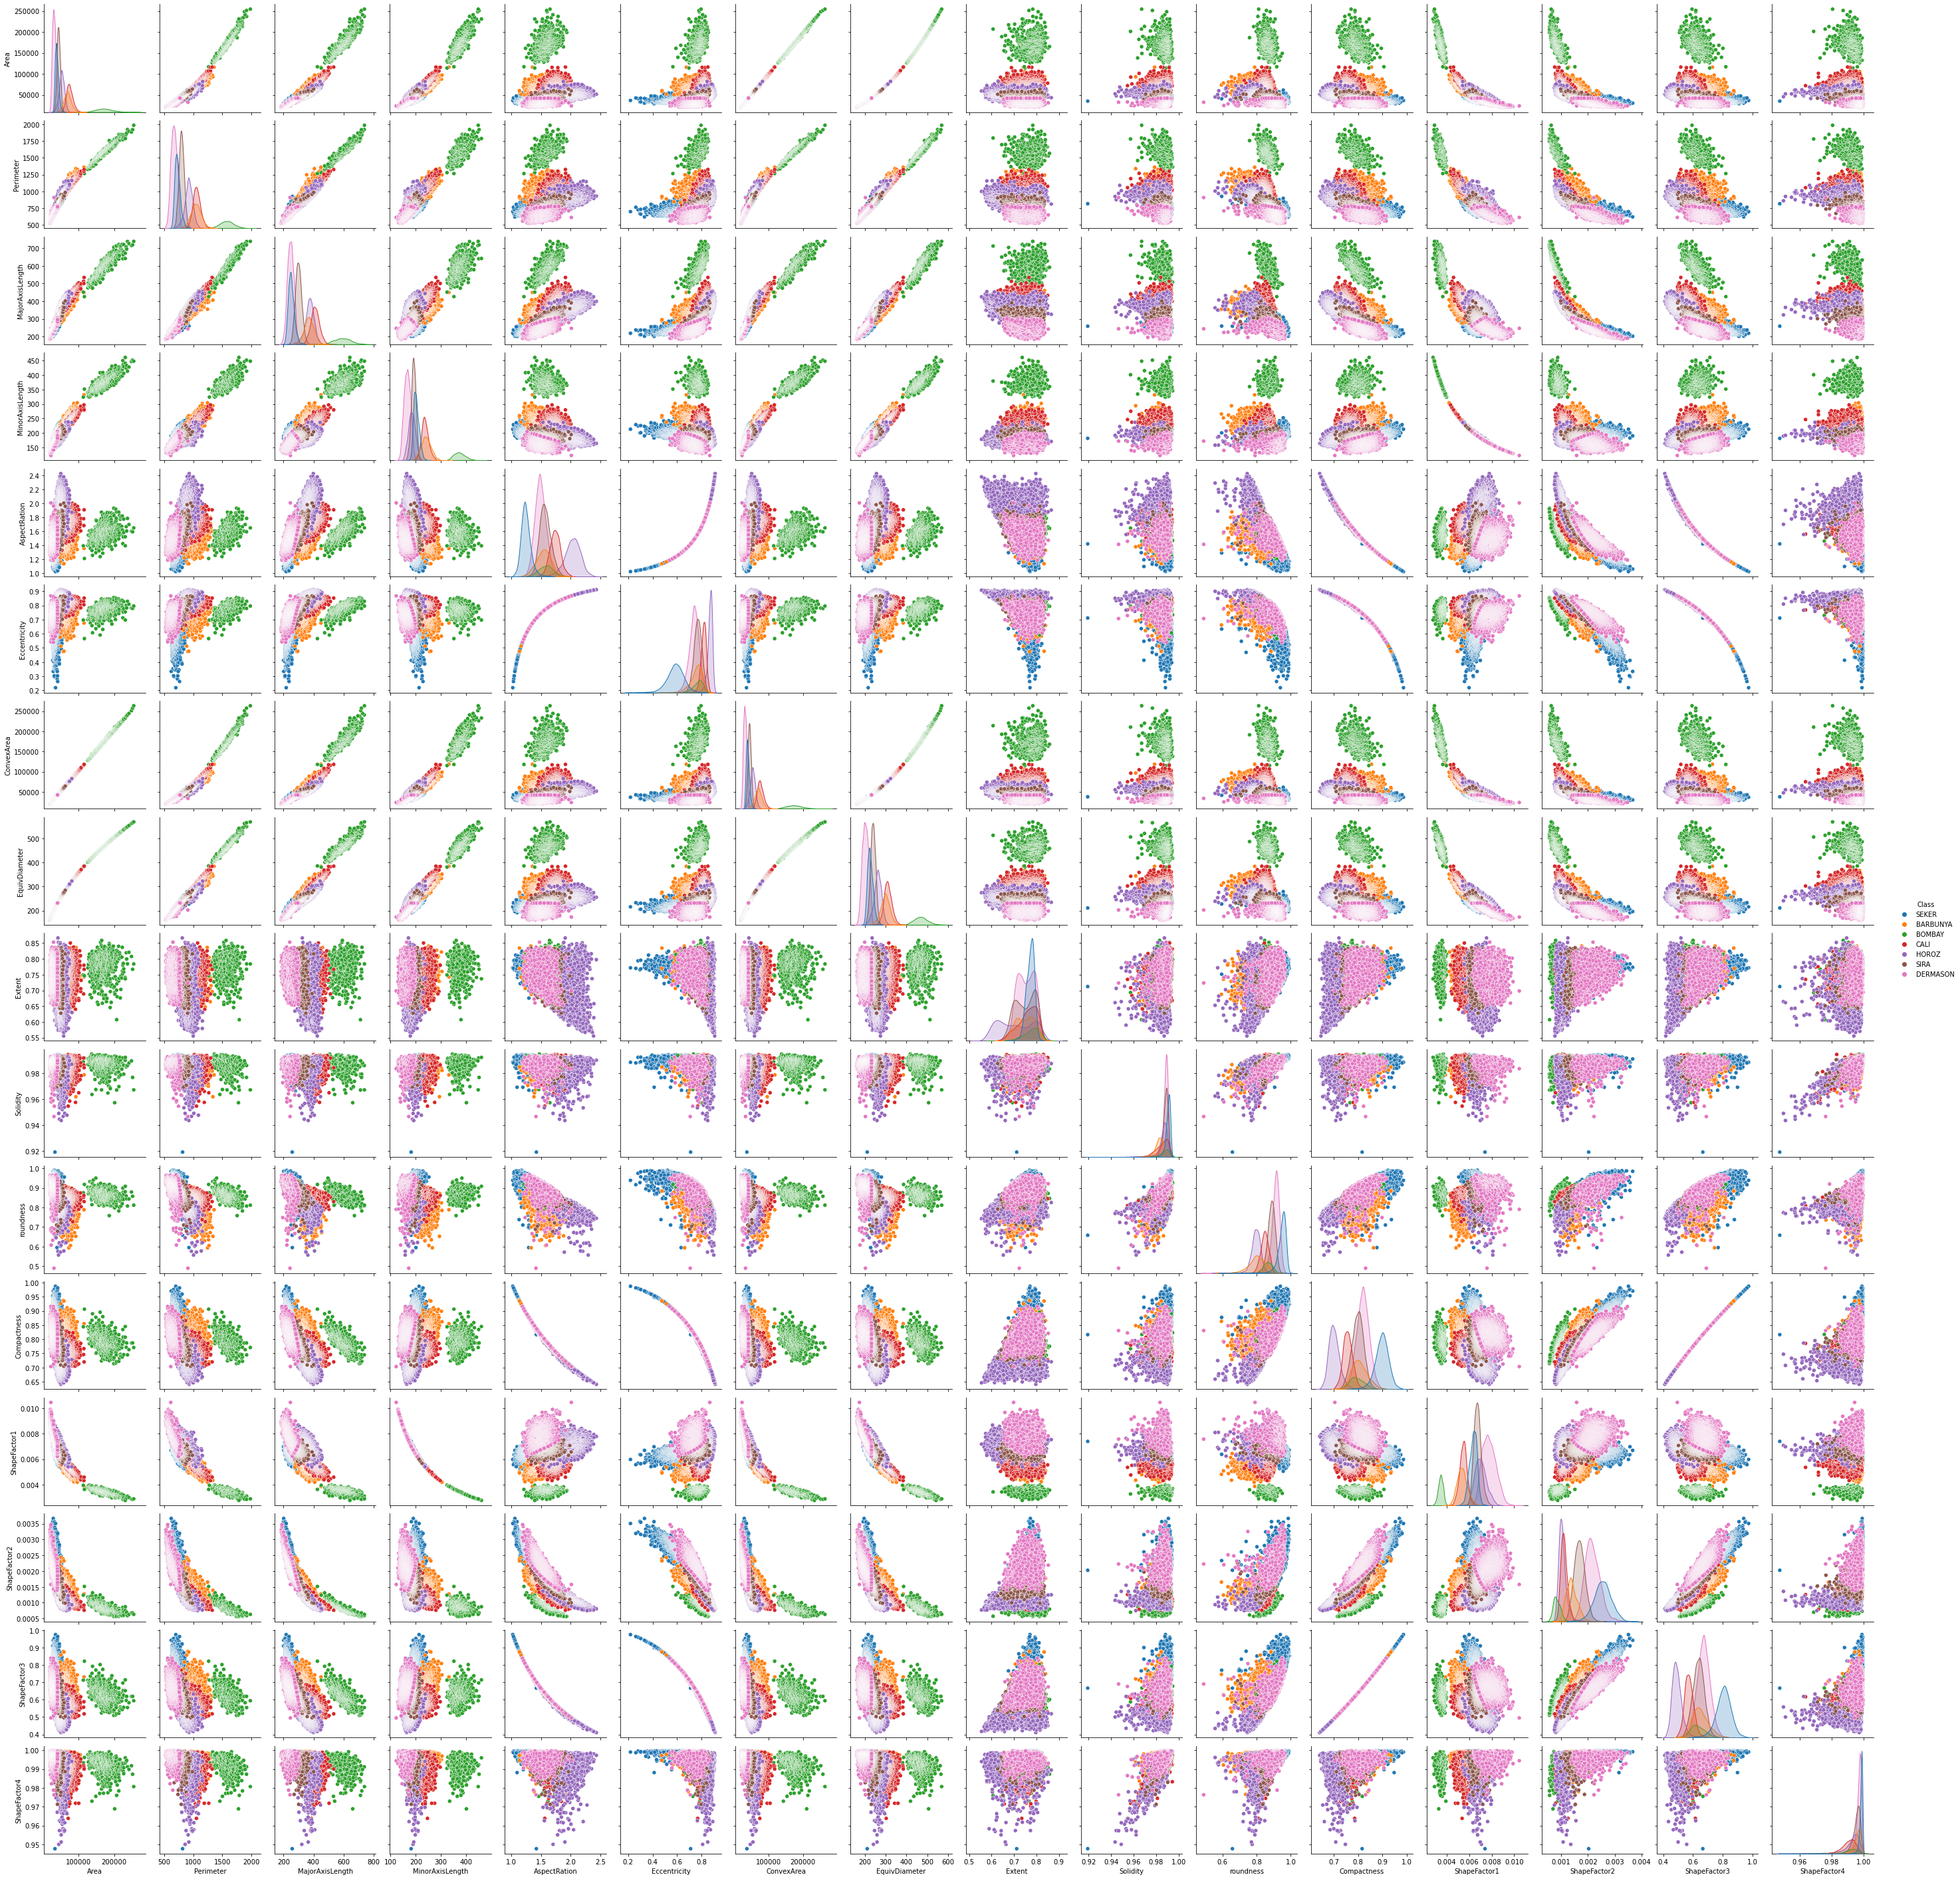

In [20]:
display(Image("pairplot.png"))

Since there are a lot of features, let's look at the pair plot first and then we can progress

*obvservation*

- So, it's kinda cumbersome, but still it gives us some details about it our data
- The green colored points are points belonging to `BOMBAY` our minority class. It seems any feature is good enough for separating BOMBAY from other classe.
- We can't really say the same for other classes

We can zoom in on some of the plots and see up close for ourselves that BOMBAY is easy to separate

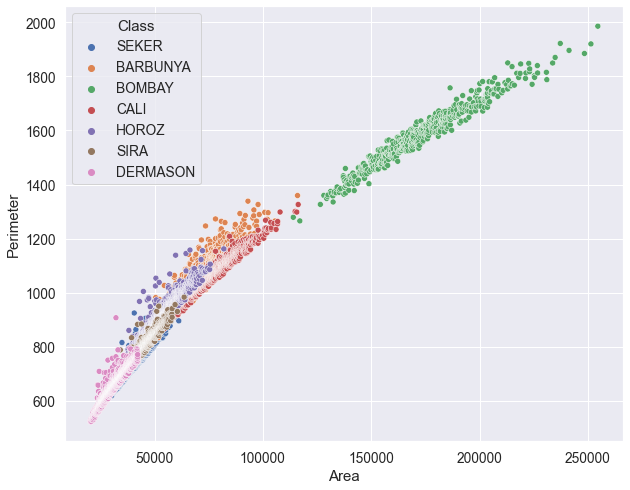

In [21]:
fig = sns.scatterplot(data=df_copy, x="Area", y="Perimeter", hue="Class")

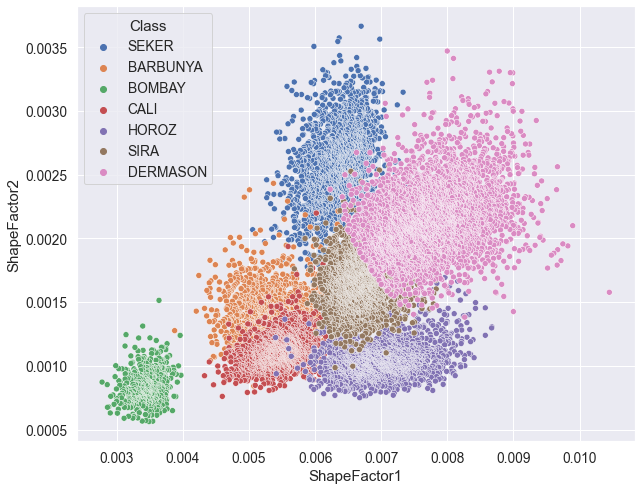

In [22]:
fig = sns.scatterplot(data=df_copy, x="ShapeFactor1", y="ShapeFactor2", hue="Class")

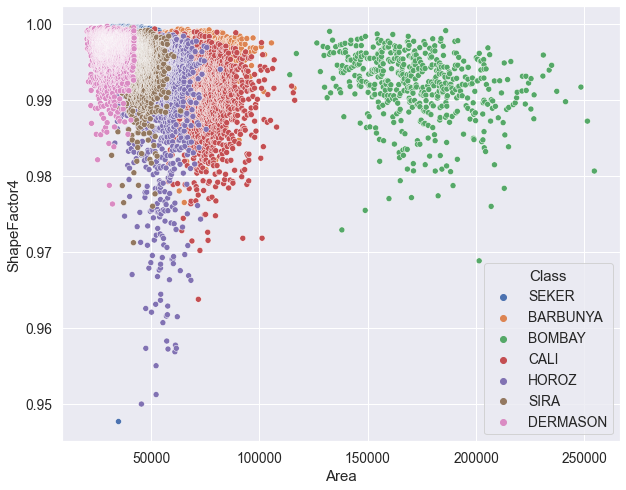

In [23]:
fig = sns.scatterplot(data=df_copy, x="Area", y="ShapeFactor4", hue="Class")

Now, lets zoom in on some features which are highly correlated to each other

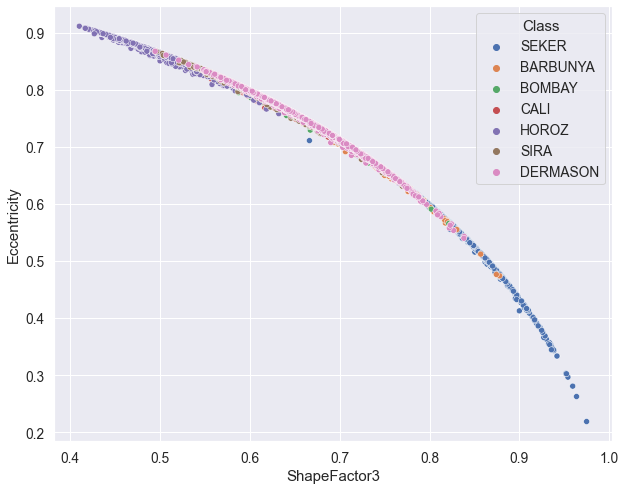

In [24]:
fig = sns.scatterplot(data=df_copy, x="ShapeFactor3", y="Eccentricity", hue="Class")

*Obvservation*

- ShapeFactor3 and Eccentricity are high negative correlation, they seem to be perfectly lining up

Few other features with high negative and positive correlation

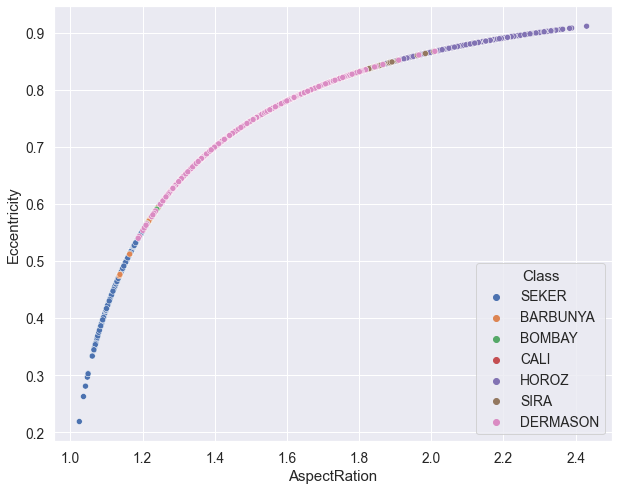

In [25]:
fig = sns.scatterplot(data=df_copy, x="AspectRation", y="Eccentricity", hue="Class")

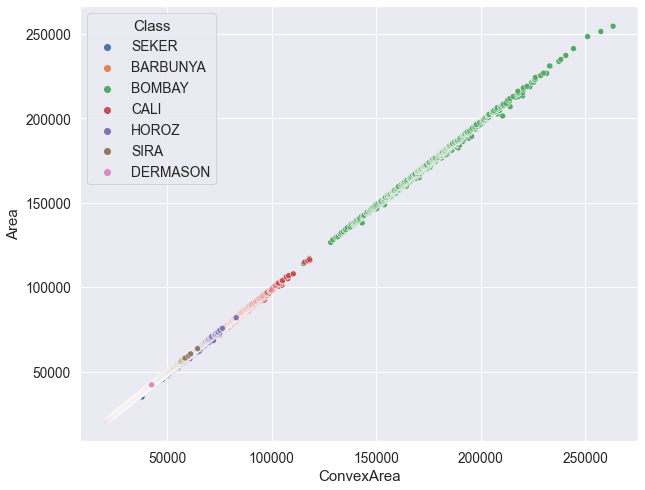

In [26]:
fig = sns.scatterplot(data=df_copy, x="ConvexArea", y="Area", hue="Class")

*Obvservation*

- This is pretty interesting to look at, Area and ConvexArea seem to be the exact same features. Makes sense as ConvexArea approximates Area to the closest convex polygon

Let's Move on to correlation analysis

## Correlation Analysis

In [17]:
corr = df_copy.corr()
corr

Area  Perimeter  MajorAxisLength  MinorAxisLength  \
Area             1.000000   0.966722         0.931834         0.951602   
Perimeter        0.966722   1.000000         0.977338         0.913179   
MajorAxisLength  0.931834   0.977338         1.000000         0.826052   
MinorAxisLength  0.951602   0.913179         0.826052         1.000000   
AspectRation     0.241735   0.385276         0.550335        -0.009161   
Eccentricity     0.267481   0.391066         0.541972         0.019574   
ConvexArea       0.999939   0.967689         0.932607         0.951339   
EquivDiameter    0.984968   0.991380         0.961733         0.948539   
Extent           0.054345  -0.021160        -0.078062         0.145957   
Solidity        -0.196585  -0.303970        -0.284302        -0.155831   
roundness       -0.357530  -0.547647        -0.596358        -0.210344   
Compactness     -0.268067  -0.406857        -0.568377        -0.015066   
ShapeFactor1    -0.847958  -0.864623        -0.773609        -0.947204   
ShapeFactor2    -0.639291  -0.767592        -0.859238        -0.471347   
ShapeFactor3    -0.272145  -0.408435        -0.568185        -0.019326   
ShapeFactor4    -0.355721  -0.429310        -0.482527        -0.263749   

                 AspectRation  Eccentricity  ConvexArea  EquivDiameter  \
Area                 0.241735      0.267481    0.999939       0.984968   
Perimeter            0.385276      0.391066    0.967689       0.991380   
MajorAxisLength      0.550335      0.541972    0.932607       0.961733   
MinorAxisLength     -0.009161      0.019574    0.951339       0.948539   
AspectRation         1.000000      0.924293    0.243301       0.303647   
Eccentricity         0.924293      1.000000    0.269255       0.318667   
ConvexArea           0.243301      0.269255    1.000000       0.985226   
EquivDiameter        0.303647      0.318667    0.985226       1.000000   
Extent              -0.370184     -0.319362    0.052564       0.028383   
Solidity            -0.267754     -0.297592   -0.206191      -0.231648   
roundness           -0.766979     -0.722272   -0.362083      -0.435945   
Compactness         -0.987687     -0.970313   -0.269922      -0.327650   
ShapeFactor1         0.024593      0.019920   -0.847950      -0.892741   
ShapeFactor2        -0.837841     -0.860141   -0.640862      -0.713069   
ShapeFactor3        -0.978592     -0.981058   -0.274024      -0.330389   
ShapeFactor4        -0.449264     -0.449354   -0.362049      -0.392512   

                   Extent  Solidity  roundness  Compactness  ShapeFactor1  \
Area             0.054345 -0.196585  -0.357530    -0.268067     -0.847958   
Perimeter       -0.021160 -0.303970  -0.547647    -0.406857     -0.864623   
MajorAxisLength -0.078062 -0.284302  -0.596358    -0.568377     -0.773609   
MinorAxisLength  0.145957 -0.155831  -0.210344    -0.015066     -0.947204   
AspectRation    -0.370184 -0.267754  -0.766979    -0.987687      0.024593   
Eccentricity    -0.319362 -0.297592  -0.722272    -0.970313      0.019920   
ConvexArea       0.052564 -0.206191  -0.362083    -0.269922     -0.847950   
EquivDiameter    0.028383 -0.231648  -0.435945    -0.327650     -0.892741   
Extent           1.000000  0.191389   0.344411     0.354212     -0.141616   
Solidity         0.191389  1.000000   0.607150     0.303766      0.153388   
roundness        0.344411  0.607150   1.000000     0.768086      0.230273   
Compactness      0.354212  0.303766   0.768086     1.000000     -0.009394   
ShapeFactor1    -0.141616  0.153388   0.230273    -0.009394      1.000000   
ShapeFactor2     0.237956  0.343559   0.782824     0.868939      0.469197   
ShapeFactor3     0.347624  0.307662   0.763126     0.998686     -0.008320   
ShapeFactor4     0.148502  0.702163   0.472149     0.484436      0.248619   

                 ShapeFactor2  ShapeFactor3  ShapeFactor4  
Area                -0.639291     -0.272145     -0.355721  
Perimeter           -0.767592     -0.408435     -0.429310  
MajorAxisLeng

In [28]:
df_lt = corr.where(np.triu(np.ones(corr.shape)).astype(np.bool))

C:\Users\abhi0\AppData\Local\Temp/ipykernel_19444/218129081.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_lt = corr.where(np.triu(np.ones(corr.shape)).astype(np.bool))


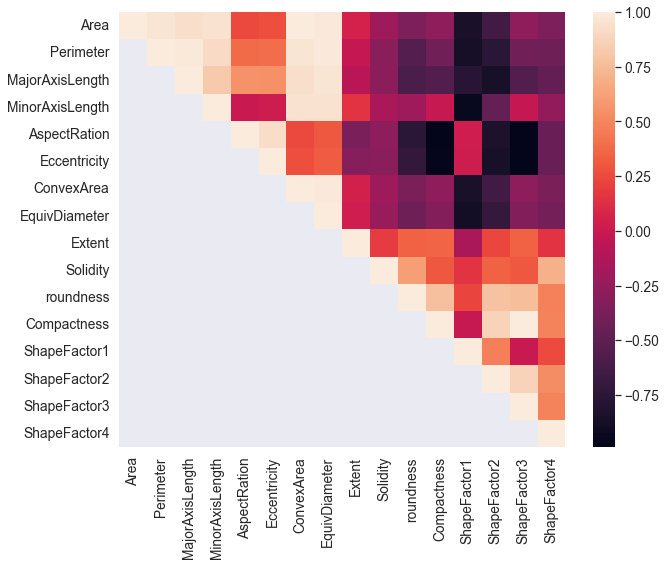

In [29]:
_ = sns.heatmap(df_lt)

*Obvservation*

- As, we can see that most of our features are highly correlated either negatively or positively. 
- My hypothesis is even if we use very less features, we will still be able to descibe our data well.

Let's use PCA and see if that holds true. The idea of PCA is simple — reduce the number of variables of a data set, while preserving as much information as possible. 

In [30]:
df_feats = df_copy.copy()

scaler = StandardScaler()
df_feats[FEATURE_COLUMNS] = scaler.fit_transform(df_feats[FEATURE_COLUMNS])

In [31]:
pca = PCA(n_components=16, random_state=42)
pca.fit(df_feats[FEATURE_COLUMNS])

PCA(n_components=16, random_state=42)

In [32]:
X_pca = pca.transform(df_feats[FEATURE_COLUMNS])

<AxesSubplot:>

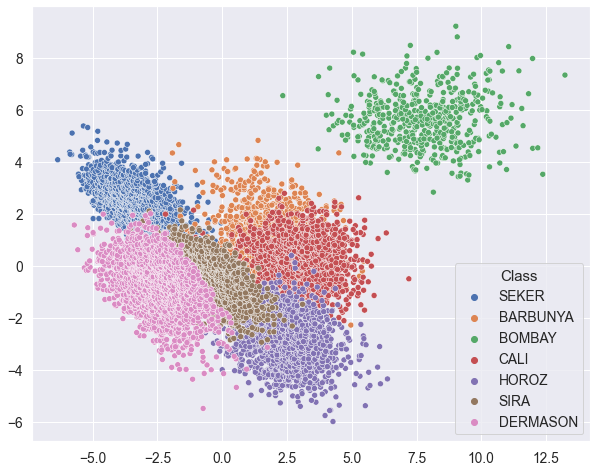

In [33]:
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df_feats["Class"])

*Obvservation*

- It's interesting to see that just the first 5 components are good enough to explain 96 % of the data. If we take just 8 out of the 16 components, we can explain the whole data
- But PCA is like not so good for interpretebility. Nonetheless, it kind of validates my hypothesis

## Feature importances

In [34]:
X = df_feats[FEATURE_COLUMNS].values
y = df_feats["Class"].values

rf = RandomForestClassifier()
rf.fit(X, y)

RandomForestClassifier()

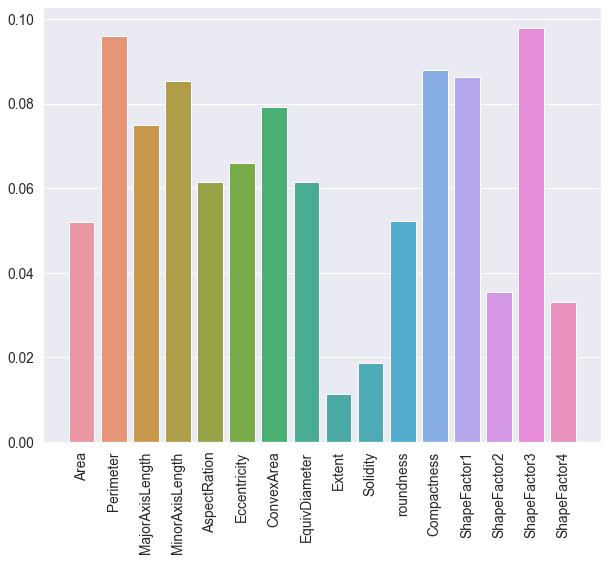

In [35]:
f = sns.barplot(x=FEATURE_COLUMNS, y=rf.feature_importances_)
f.set_xticklabels(labels=FEATURE_COLUMNS, rotation=90)
_ = f.plot()

*Obvservation*

- `ShapeFactor3`, `Compactness`, `Perimeter` have the highest importances.
- We will use one of them to remove outliers.

## Cleaning the data

### Dealing with missing values 

In [36]:
Table = PrettyTable(["column", "NA count", "Null count"])
for column in df_copy.columns.to_list():
    Table.add_row([column, df[column].isna().sum(), df[column].isnull().sum()])

print(Table)

+-----------------+----------+------------+
|      column     | NA count | Null count |
+-----------------+----------+------------+
|       Area      |    0     |     0      |
|    Perimeter    |    0     |     0      |
| MajorAxisLength |    0     |     0      |
| MinorAxisLength |    0     |     0      |
|   AspectRation  |    0     |     0      |
|   Eccentricity  |    0     |     0      |
|    ConvexArea   |    0     |     0      |
|  EquivDiameter  |    0     |     0      |
|      Extent     |    0     |     0      |
|     Solidity    |    0     |     0      |
|    roundness    |    0     |     0      |
|   Compactness   |    0     |     0      |
|   ShapeFactor1  |    0     |     0      |
|   ShapeFactor2  |    0     |     0      |
|   ShapeFactor3  |    0     |     0      |
|   ShapeFactor4  |    0     |     0      |
|      Class      |    0     |     0      |
+-----------------+----------+------------+


*obvservation*

- As you can see, the dataset is fairly complete with no missing or na values. So, we don't need to deal with them

### Checking for negative values

Since all the featues are either dimensional or derived from the dimensional features, thhe values can't be negative. Let's cehck for negative features.

In [37]:
df_copy[FEATURE_COLUMNS].lt(0).sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
dtype: int64

*Obvservation*

- All the columns have positive values which is good as we can now use all rows

### Outlier Removal

Let's see the distirbution of the features

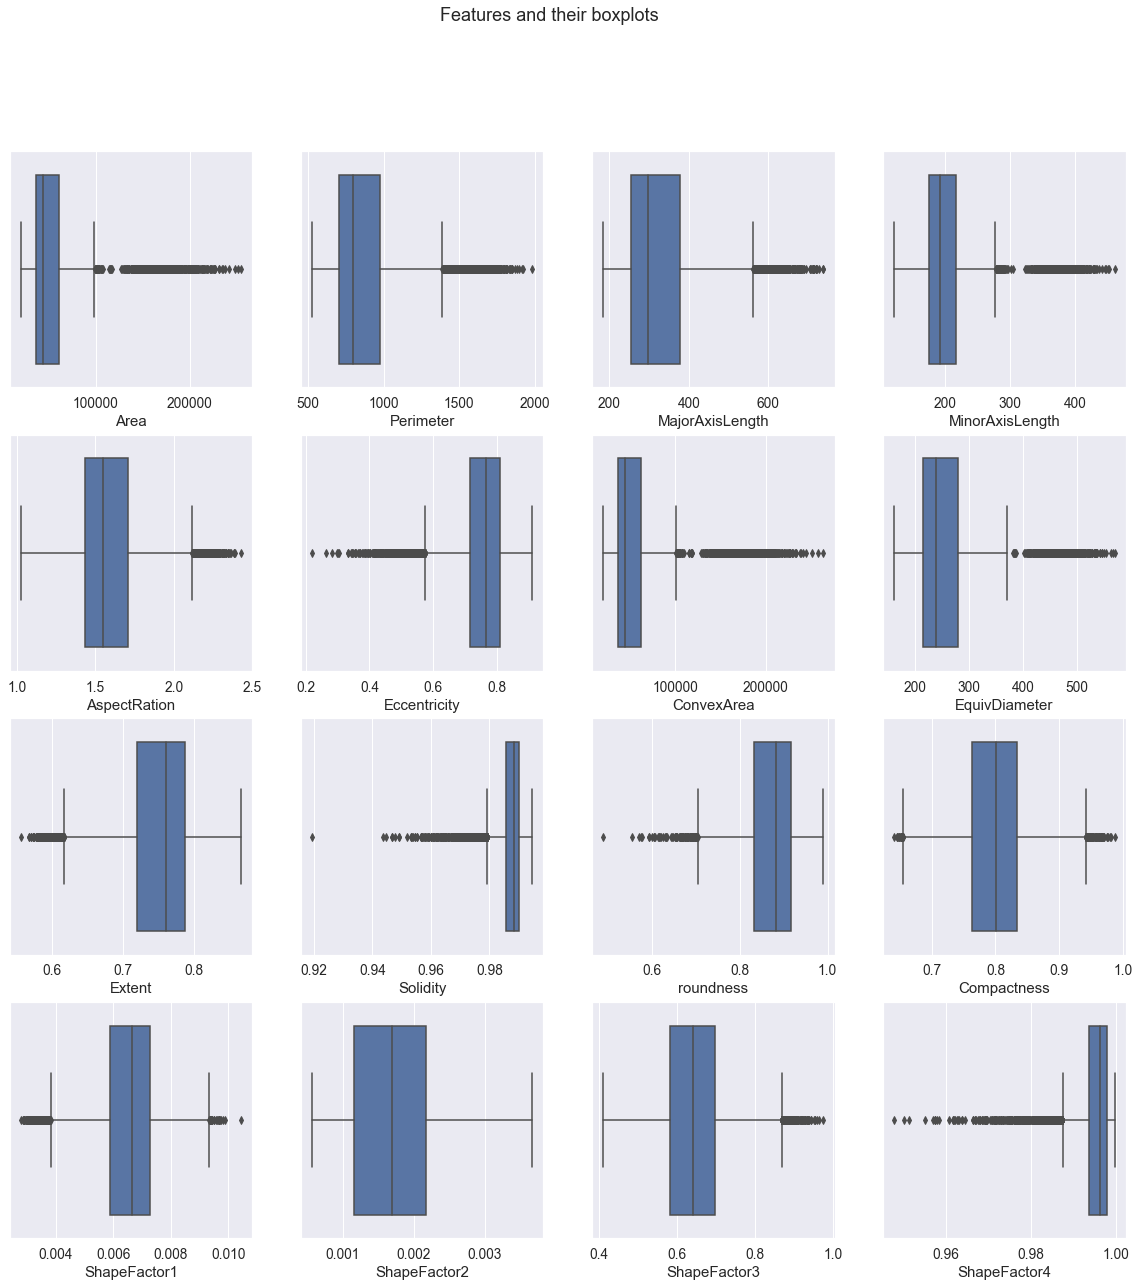

In [38]:
fig, axes = plt.subplots(4, 4)
fig.suptitle("Features and their boxplots")
fig.set_size_inches(20, 20, forward=True)

k = 0
for i in range(4):
    for j in range(4):
        sns.boxplot(ax=axes[i, j], data=df_copy, x=FEATURE_COLUMNS[k])
        k += 1

In [39]:
def percent_rows_retained(df_copy, _column, method="iqr"):
    """
    This function calculates the percentage of rows retained
    by using a single feature to remove outliers

    Parameters
    ----------
    df_copy: the dataframe

    _column: the feature to use for outlier removal

    method: {'iqr', 'zcore'}
        The method to use for outlier removal


    Returns
    -------
    percentage: the percentage of rows retained after outlier removal

    new_df: the new dataframe cleaned of outliers

    """
    _desc = df_copy.describe()

    rows_retianed = 0

    if method == "iqr":
        iqr_val = _desc[_column].loc["75%"] - _desc[_column].loc["25%"]
        udr_val = _desc[_column].loc["75%"] + (1.5 * iqr_val)
        ldr_val = _desc[_column].loc["25%"] - (1.5 * iqr_val)

        if ldr_val < 0:
            ldr_val = 0

        rows_retained = len(
            df_copy[(df_copy[_column] < udr_val) & (df_copy[_column] > ldr_val)]
        )
        total_rows = len(df_copy)

        new_df = df_copy[(df_copy[_column] < udr_val) & (df_copy[_column] > ldr_val)]

    if method == "zscore":
        zscore_val = zscore(df_copy[_column])

        idxs = np.where(zscore_val < 3)[0]

        rows_retained = len(df_copy.iloc[[*idxs]])
        total_rows = len(df_copy)

        new_df = df_copy.iloc[[*idxs]]

    percentage = round((rows_retained / total_rows) * 100, 3)

    return percentage, new_df

In [40]:
def apply_method(df_copy, method="iqr"):
    """
    This function applies the `percentage_rows_retained` method
    to all the features and returns a table containing the results

    Parameters
    ----------
    df_copy: the dataframe

    method: {'iqr', 'zcore'}
        The method to use for outlier removal


    Returns
    -------
    table: PrettyTable
        returns a table of type PrettyTable to be displayed
    """
    table = PrettyTable(["column", "method", "% data retained"])
    table.set_style(DEFAULT)
    for column in df_copy.columns[:-1].to_list():
        info = percent_rows_retained(df_copy, column, method=method)[0]
        table.add_row([column, method, info])

    return table

In [41]:
print(
    f"Maximum value of area -> {desc['Area'].loc['max']} \nMinimum value of area -> {desc['Area'].loc['min']}"
)

Maximum value of area -> 254616.0 
Minimum value of area -> 20420.0


Let's remove the outliers. We first calculate the inter-quartile range

In [42]:
iqr_area = desc.Area.loc["75%"] - desc.Area.loc["25%"]
print(f"The IQR for `Area` -> {iqr_area}")

The IQR for `Area` -> 25004.0


In [43]:
udr_area = desc.Area.loc["75%"] + (1.5 * iqr_area)
ldr_area = desc.Area.loc["25%"] - (1.5 * iqr_area)

print(
    f"Setting the upper data range to {desc.Area.loc['75%'] + (1.5 * iqr_area)} \n"
    f"Setting the lower data range to {desc.Area.loc['25%'] - (1.5 * iqr_area)}"
)

Setting the upper data range to 98838.0 
Setting the lower data range to -1178.0


The lower boundary goes into negatives! Area can't be negative. So, I am going to fix it at 0

In [44]:
ldr_area = 0
percent_rows_retained(df_copy, "Area")[0]

95.952

In [45]:
def save_file(fname, df_to_csv):
    """
    Save the cleaned Dataframe as a csv file

    Parameters
    ----------

    fname: the name of the new file

    df_to_csv: the cleaned Dataframe

    """

    if Path(fname).is_file():
        print("File already exists! Skipping...")
    else:
        df_to_csv.sample(frac=1).to_csv(fname, index=False)

In [46]:
table = apply_method(df_copy, method="zscore")
print(table.get_string(sortby="% data retained", reversesort=True))

+-----------------+--------+-----------------+
|      column     | method | % data retained |
+-----------------+--------+-----------------+
|    roundness    | zscore |      100.0      |
|     Solidity    | zscore |      100.0      |
|   ShapeFactor4  | zscore |      100.0      |
|      Extent     | zscore |      100.0      |
|   Eccentricity  | zscore |      100.0      |
|   ShapeFactor1  | zscore |      99.993     |
|   Compactness   | zscore |      99.993     |
|   ShapeFactor2  | zscore |      99.963     |
|   ShapeFactor3  | zscore |      99.941     |
|   AspectRation  | zscore |      99.89      |
| MajorAxisLength | zscore |      97.678     |
|    Perimeter    | zscore |      97.032     |
|  EquivDiameter  | zscore |      96.584     |
|    ConvexArea   | zscore |      96.451     |
|       Area      | zscore |      96.451     |
| MinorAxisLength | zscore |      96.268     |
+-----------------+--------+-----------------+


In [47]:
table1 = apply_method(df_copy, method="iqr")
print(table1.get_string(sortby="% data retained", reversesort=True))

+-----------------+--------+-----------------+
|      column     | method | % data retained |
+-----------------+--------+-----------------+
|   ShapeFactor2  |  iqr   |      100.0      |
|    roundness    |  iqr   |      99.331     |
|   Compactness   |  iqr   |      99.199     |
|   ShapeFactor3  |  iqr   |      98.567     |
|      Extent     |  iqr   |      97.98      |
| MajorAxisLength |  iqr   |      97.215     |
|   AspectRation  |  iqr   |      96.525     |
|    Perimeter    |  iqr   |      96.327     |
|  EquivDiameter  |  iqr   |      96.135     |
|   ShapeFactor1  |  iqr   |      96.084     |
|    ConvexArea   |  iqr   |      95.959     |
|       Area      |  iqr   |      95.952     |
| MinorAxisLength |  iqr   |      95.82      |
|   ShapeFactor4  |  iqr   |      94.365     |
|     Solidity    |  iqr   |      94.284     |
|   Eccentricity  |  iqr   |      93.806     |
+-----------------+--------+-----------------+


I will use then `iqr` method to remove outliers. Let's go with the column `ConvexArea`, it will help us retain alomot 96 % of the data and also remove outliers

In [48]:
df_cleaned = percent_rows_retained(df_copy, "Perimeter", method="iqr")[1]

In [49]:
df_cleaned.head(10)

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   
5  30279    634.927       212.560556       181.510182      1.171067   
6  30477    670.033       211.050155       184.039050      1.146768   
7  30519    629.727       212.996755       182.737204      1.165591   
8  30685    635.681       213.534145       183.157146      1.165852   
9  30834    631.934       217.227813       180.897469      1.200834   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272751  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   
5      0.520401       30600     196.347702  0.775688  0.989510   0.943852   
6      0.489478       30970     196.988633  0.762402  0.984081   0.853080   
7      0.513760       30847     197.124320  0.770682  0.989367   0.967109   
8      0.514081       31044     197.659696  0.771561  0.988436   0.954240   
9      0.553642       31120     198.139012  0.783683  0.990810   0.970278   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332      0.003147      0.834222      0.998724  SEKER  
1     0.953861      0.006979      0.003564      0.909851      0.998430  SEKER  
2     0.908774      0.007244      0.003048      0.825871      0.999066  SEKER  
3     0.928329      0.007017      0.003215      0.861794      0.994199  SEKER  
4     0.970516      0.006697      0.003665      0.941900      0.999166  SEKER  
5     0.923726      0.007020      0.003153      0.853270      0.999236  SEKER  
6     0.933374      0.006925      0.003242      0.871186      0.999049  SEKER  
7     0.925480      0.006979      0.003158      0.856514      0.998345  SEKER  
8     0.925658      0.006959      0.003152      0.856844      0.998953  SEKER  
9     0.912125      0.007045      0.003008      0.831973      0.999061  SEKER

In [50]:
save_file("Data_removed_outlier_zscore.csv", df_to_csv=df_cleaned)

File already exists! Skipping...
